In [ ]:
import pandas as pd

# Carregar os dados
file_path = "C:/Users/yasmi/INTELIGENCIA ARTIFICIAL/mushroom-classifier/data/agaricus-lepiota.data"
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

df = pd.read_csv(file_path, header=None, names=column_names)

# Exibir as primeiras linhas do dataset
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


C:\Users\yasmi\AppData\Local\Temp\ipykernel_17056\579063437.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_correlation_all["Correlação"], y=df_correlation_all["Feature"], palette="coolwarm")


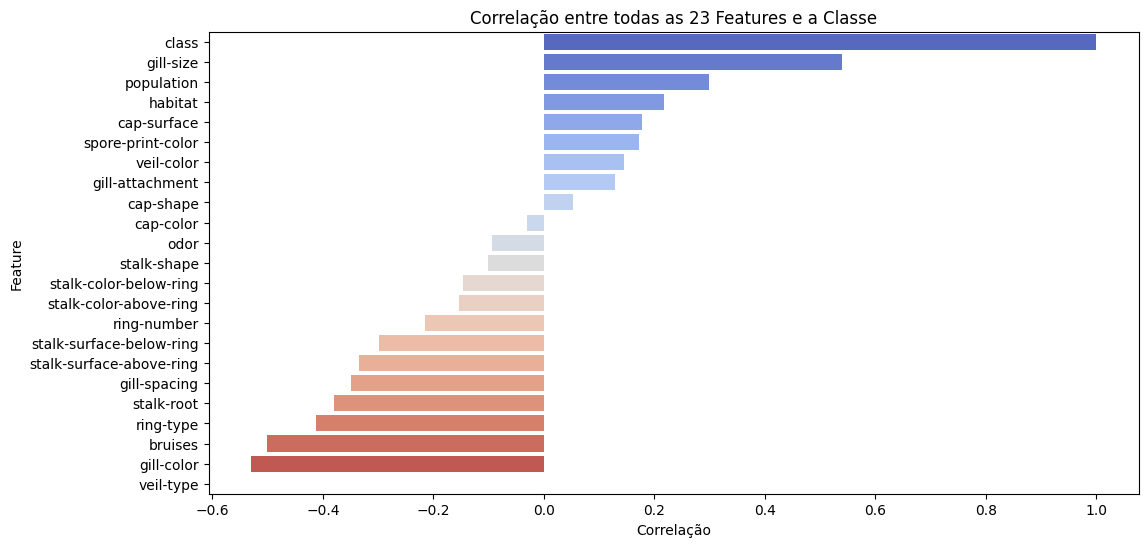

C:\Users\yasmi\AppData\Local\Temp\ipykernel_17056\579063437.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_correlation_selected["Correlação"], y=df_correlation_selected["Feature"], palette="coolwarm")


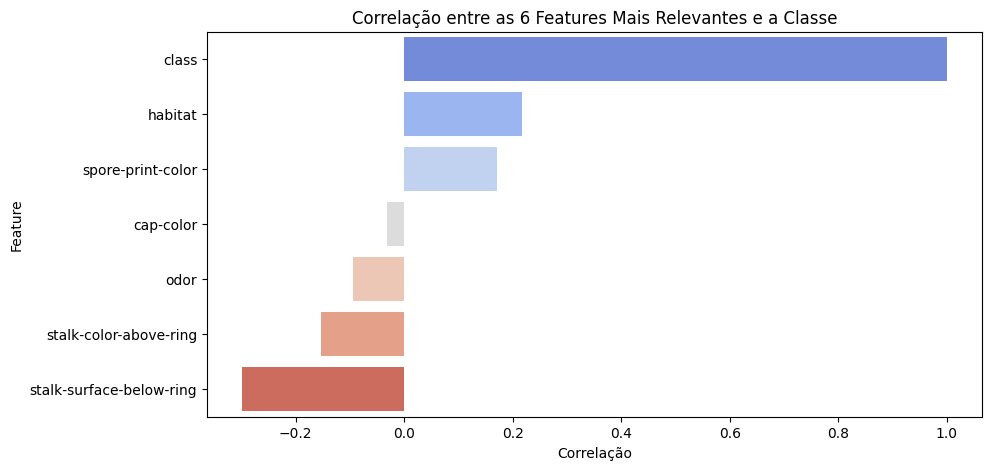

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Carregar os dados
file_path = "../data/agaricus-lepiota.data"
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
df = pd.read_csv(file_path, header=None, names=column_names)

# Converter valores categóricos para numéricos
df_encoded = df.apply(LabelEncoder().fit_transform)

# Calcular a correlação entre cada feature e a classe
correlation_all = df_encoded.corr()["class"].sort_values(ascending=False)

# Selecionar as 6 features mais relevantes para cogumelos venenosos
selected_features = ["odor", "spore-print-color", "stalk-surface-below-ring", 
                     "stalk-color-above-ring", "habitat", "cap-color"]

# Calcular a correlação apenas entre as 6 principais features e a classe
correlation_selected = df_encoded[selected_features + ["class"]].corr()["class"].sort_values(ascending=False)

# Criar DataFrames
df_correlation_all = correlation_all.to_frame().reset_index().rename(columns={"index": "Feature", "class": "Correlação"})
df_correlation_selected = correlation_selected.to_frame().reset_index().rename(columns={"index": "Feature", "class": "Correlação"})

# Plotar as correlações para todas as features
plt.figure(figsize=(12, 6))
sns.barplot(x=df_correlation_all["Correlação"], y=df_correlation_all["Feature"], palette="coolwarm")
plt.title("Correlação entre todas as 23 Features e a Classe")
plt.xlabel("Correlação")
plt.ylabel("Feature")
plt.show()

# Plotar as correlações para as 6 principais features
plt.figure(figsize=(10, 5))
sns.barplot(x=df_correlation_selected["Correlação"], y=df_correlation_selected["Feature"], palette="coolwarm")
plt.title("Correlação entre as 6 Features Mais Relevantes e a Classe")
plt.xlabel("Correlação")
plt.ylabel("Feature")
plt.show()


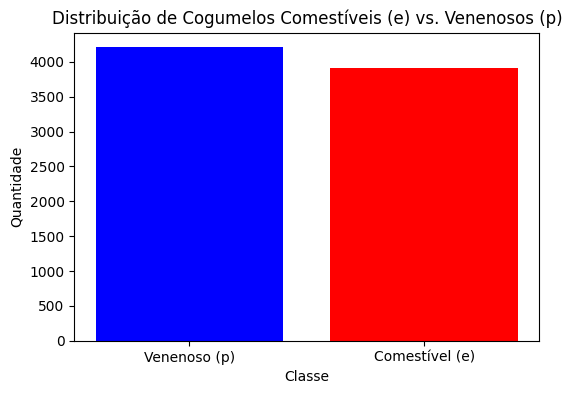

In [7]:
import matplotlib.pyplot as plt

# Contagem das classes
class_counts = df["class"].value_counts()

# Plotar a distribuição das classes
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.title("Distribuição de Cogumelos Comestíveis (e) vs. Venenosos (p)")
plt.xticks(ticks=[0, 1], labels=["Venenoso (p)", "Comestível (e)"])
plt.show()


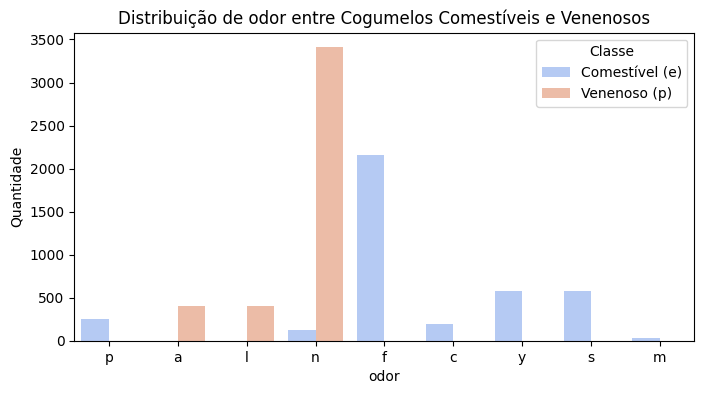

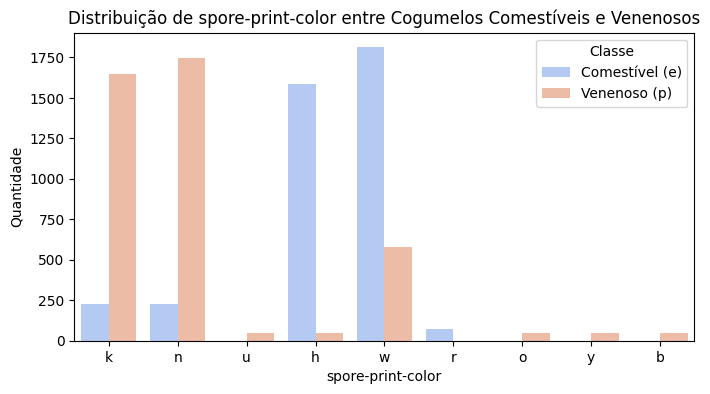

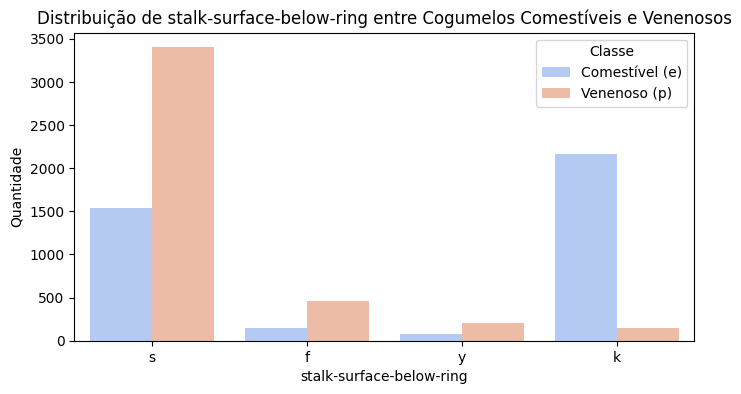

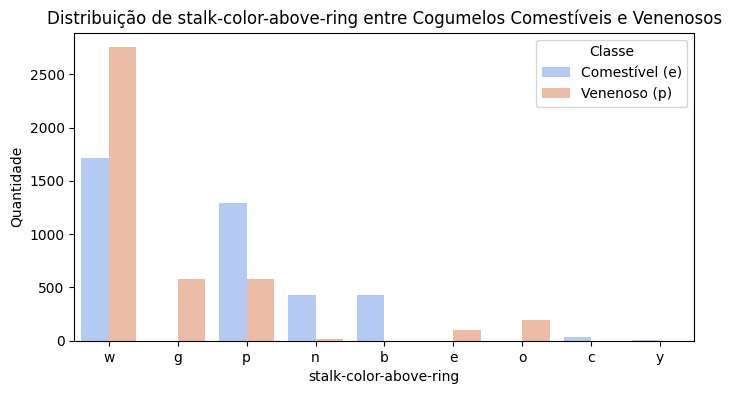

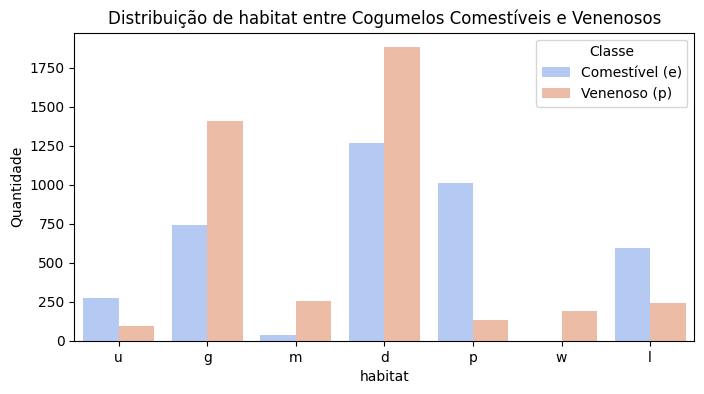

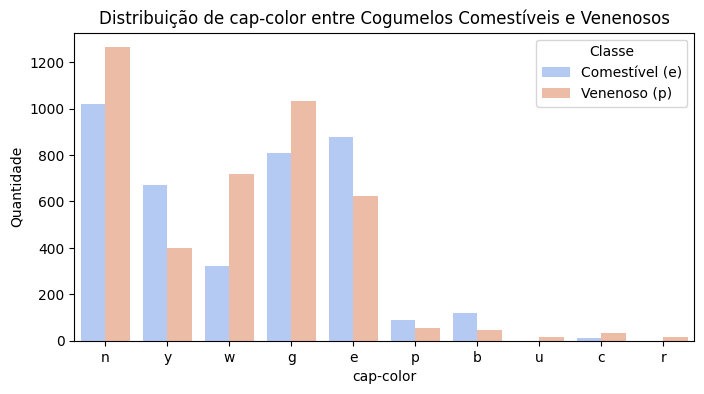

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista das 6 principais features
important_features = ["odor", "spore-print-color", "stalk-surface-below-ring",
                      "stalk-color-above-ring", "habitat", "cap-color"]

# Criar gráficos de contagem para cada feature
for feature in important_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue="class", palette="coolwarm")
    plt.xlabel(feature)
    plt.ylabel("Quantidade")
    plt.title(f"Distribuição de {feature} entre Cogumelos Comestíveis e Venenosos")
    plt.legend(title="Classe", labels=["Comestível (e)", "Venenoso (p)"])
    plt.show()


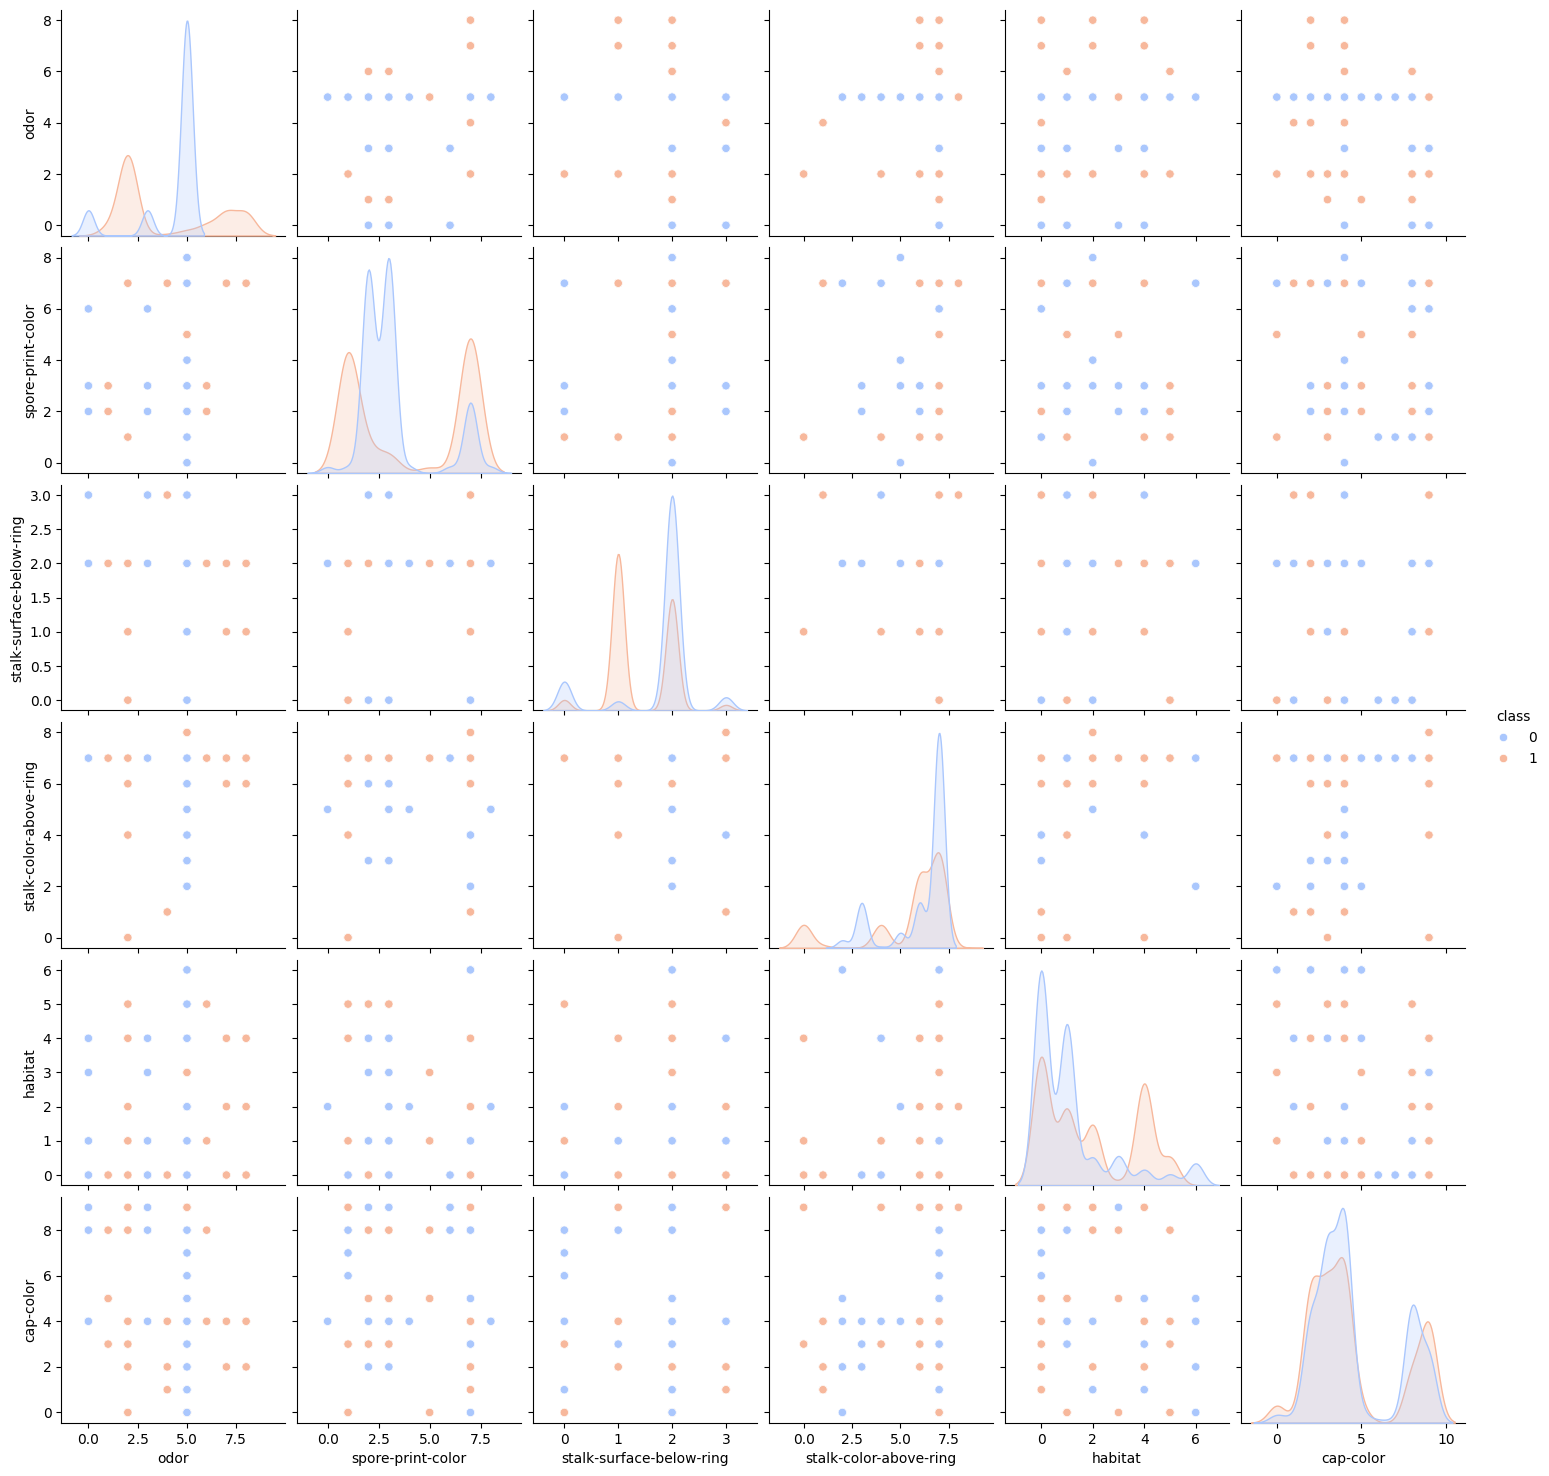

In [10]:
import seaborn as sns

# Criar um pairplot para visualizar a relação entre as 6 features principais e a classe
sns.pairplot(df_encoded, vars=important_features, hue="class", palette="coolwarm")
plt.show()
